# How to Load Pictures and Visualizing them

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import keras
keras.__version__

'2.2.0'

### Preparation of datasets (dogs=1 vs. cats=0)

> download dataset from: https://www.kaggle.com/c/dogs-vs-cats/data  
> unzip it

In [20]:
import os, shutil

In [33]:
# The path to the directory where the original dataset was uncompressed
base_dir = '/Users/ihongdon/Downloads'
img_dir = '/Users/ihongdon/Downloads/all/train'

In [22]:
len(os.listdir(img_dir))

25000

In [139]:
os.listdir(img_dir)[:10]

['dog.8011.jpg',
 'cat.5077.jpg',
 'dog.7322.jpg',
 'cat.2718.jpg',
 'cat.10151.jpg',
 'cat.3406.jpg',
 'dog.1753.jpg',
 'cat.4369.jpg',
 'cat.7660.jpg',
 'dog.5535.jpg']

In [34]:
# Directory with 30 cat pictures
cats30_dir = os.path.join(base_dir, 'cats30')

# Make a path directory
os.mkdir(cats30_dir)

In [36]:
# Copy first 30 cat images to cats30_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(30)]

for fname in fnames:
    src = os.path.join(img_dir, fname)
    dst = os.path.join(cats30_dir, fname)
    shutil.copyfile(src, dst)

In [142]:
# check if pictures were copied well in cats30 directory
os.listdir(cats30_dir)

['cat.6.jpg',
 'cat.24.jpg',
 'cat.18.jpg',
 'cat.19.jpg',
 'cat.25.jpg',
 'cat.7.jpg',
 'cat.5.jpg',
 'cat.27.jpg',
 'cat.26.jpg',
 'cat.4.jpg',
 'cat.0.jpg',
 'cat.22.jpg',
 'cat.23.jpg',
 'cat.1.jpg',
 'cat.3.jpg',
 'cat.21.jpg',
 'cat.20.jpg',
 'cat.2.jpg',
 'cat.11.jpg',
 'cat.10.jpg',
 'cat.12.jpg',
 'cat.13.jpg',
 'cat.9.jpg',
 'cat.17.jpg',
 'cat.16.jpg',
 'cat.8.jpg',
 'cat.28.jpg',
 'cat.14.jpg',
 'cat.15.jpg',
 'cat.29.jpg']

### Convert image data to float array

In [65]:
# a picture of one cat as an example
img_name = 'cat.10.jpg'
img_path = os.path.join(cats30_dir, img_name)

# Preprocess the image into a 4D tensor using keras.preprocessing
from keras.preprocessing import image

img = image.load_img(img_path, target_size=(250, 250))
img_tensor = image.img_to_array(img)

# expand a dimension
img_tensor = np.expand_dims(img_tensor, axis=0)

# scaling into [0, 1]
img_tensor /= 255.

In [66]:
img_tensor.shape

(1, 250, 250, 3)

In [73]:
img_tensor[0].shape

(250, 250, 3)

In [74]:
img_tensor[0]

array([[[0.10196079, 0.11764706, 0.15294118],
        [0.07450981, 0.09019608, 0.1254902 ],
        [0.03137255, 0.04705882, 0.09019608],
        ...,
        [0.5058824 , 0.6313726 , 0.61960787],
        [0.49411765, 0.61960787, 0.60784316],
        [0.49019608, 0.6156863 , 0.6039216 ]],

       [[0.11764706, 0.13333334, 0.16862746],
        [0.13725491, 0.15294118, 0.1882353 ],
        [0.08627451, 0.10196079, 0.13725491],
        ...,
        [0.50980395, 0.63529414, 0.62352943],
        [0.49803922, 0.62352943, 0.6117647 ],
        [0.4862745 , 0.6117647 , 0.6       ]],

       [[0.11372549, 0.14117648, 0.16470589],
        [0.16470589, 0.19215687, 0.22352941],
        [0.15294118, 0.18039216, 0.21176471],
        ...,
        [0.50980395, 0.63529414, 0.62352943],
        [0.5019608 , 0.627451  , 0.6156863 ],
        [0.49019608, 0.6156863 , 0.6039216 ]],

       ...,

       [[0.69411767, 0.6431373 , 0.46666667],
        [0.6862745 , 0.63529414, 0.45882353],
        [0.6627451 , 0

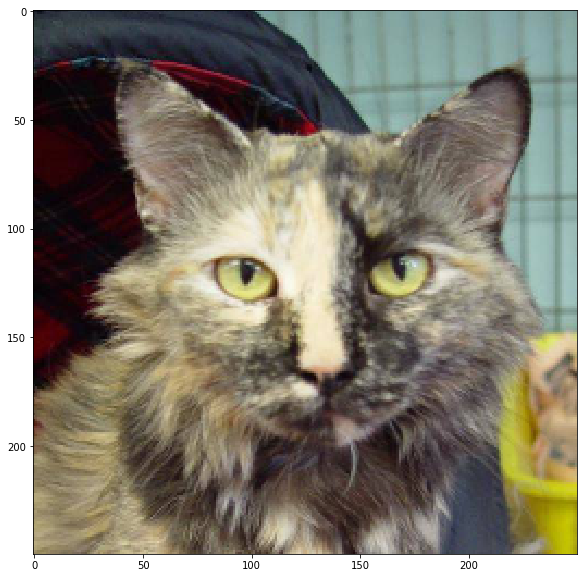

In [69]:
# Image show
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10, 10) # set figure size

plt.imshow(img_tensor[0])
plt.show()

In [135]:
# UDF of pre-processing image into a 4D tensor
def preprocess_img(img_path, target_size=100):
    from keras.preprocessing import image
    
    img = image.load_img(img_path, target_size=(target_size, target_size))
    img_tensor = image.img_to_array(img)
    
    # expand a dimension
    img_tensor = np.expand_dims(img_tensor, axis=0)
    
    # scaling into [0, 1]
    img_tensor /= 255.
    
    return img_tensor

In [136]:
# layout
n_pic = 30
n_col = 5
n_row = int(np.ceil(n_pic / n_col))

# plot & margin size
target_size = 100
margin = 3

# blank matrix to store results
total = np.zeros((n_row * target_size + (n_row - 1) * margin, n_col * target_size + (n_col - 1) * margin, 3))

# append the image tensors to the 'total matrix'
img_seq = 0

for i in range(n_row):
    for j in range(n_col):

        fname = 'cat.{}.jpg'.format(img_seq)
        img_path = os.path.join(cats30_dir, fname)

        img_tensor = preprocess_img(img_path, target_size)

        horizontal_start = i * target_size + i * margin
        horizontal_end = horizontal_start + target_size
        vertical_start = j * target_size + j * margin
        vertical_end = vertical_start + target_size

        total[horizontal_start : horizontal_end, vertical_start : vertical_end, :] = img_tensor[0]
        
        img_seq += 1

# display the pictures in grid
plt.figure(figsize=(200, 200))
plt.imshow(total)
plt.show()